In [16]:
def input_matrix():
    # Initialize an empty matrix (list of lists)
    matrix = []

    # Iterate over each row
    for i in range(3):
        row = []
        # Iterate over each column 
        for j in range(3):
            while True:
                try:
                    #Check value is an int.
                    value = int(input(f"Enter element at position ({i+1},{j+1}): "))
                    # Check value is within the range 1-9
                    if 1 <= value <= 9:
                        row.append(value)
                        break
                    else:
                        print("Input value must be between 1 and 9.")
                except ValueError:
                    print("Invalid input. Please enter an integer.")

        # Append the completed row to the matrix
        matrix.append(row)

    return matrix

# Function call to input the matrix
matrix = input_matrix()

# Print the input matrix
print("Input Matrix:")
for row in matrix:
    print(row)


Enter element at position (1,1):  2
Enter element at position (1,2):  3
Enter element at position (1,3):  6
Enter element at position (2,1):  4
Enter element at position (2,2):  7
Enter element at position (2,3):  5
Enter element at position (3,1):  8
Enter element at position (3,2):  9
Enter element at position (3,3):  1


Input Matrix:
[2, 3, 6]
[4, 7, 5]
[8, 9, 1]


In [17]:
#Record Input as variables
a = matrix[0][0]
b = matrix[0][1]
c = matrix[0][2]
d = matrix[1][0]
X = matrix[1][1]
e = matrix[1][2]
f = matrix[2][0]
g = matrix[2][1]
h = matrix[2][2]

print(f'[{a},{b},{c}],[{d},{X},{e}][{f},{g},{h}]')

[2,3,6],[4,7,5][8,9,1]


# Finding X

In [18]:
def find_X(a, b, c, d, X, e, f, g, h):
    # Define scenarios to check against
    possibles = [5, 6]

    # Iterate over specified letters (a, c, f, h)
    for letter in [a, c, f, h]:
        found_X = False
        for num in possibles:
            if letter + 3 == num or letter - 3 == num:
                X = num
                found_X = True
                break
            elif letter + 1 == num or letter - 1 == num:
                X = num
                found_X = True
                break
        if found_X:
            break
        else:
            X = 5  # Default value if none of the conditions match

    # Ensure X is within the range (3, 7)
    if 4 < X < 7:
        return X
    else:
        return None  # Or handle the case where X is not within the range


# Test if need to find X
#--------------------------------------------------------------------------------
#X = 6# Example initial value of X
print("Initial X:", X) 
#--------------------------------------------------------------------------------

possibles = [ 5, 6]
need_X = True

# Check if X is already one of the scenarios
for i in possibles:
    if X == i:
        need_X = False
        break

# If X is not in possibles, call find_X to determine X
if need_X:
    X = find_X(a,b,c,d,X,e,f,g,h)
    if X is None:
        print("X could not be determined within the specified range.")
    else:
        print("Updated X:", X)
else:
    print("X is already one of the scenarios.")

print("Final X:", X)


Initial X: 7
Updated X: 5
Final X: 5


# Define Magic Number

In [19]:

if X == 5:
   Magic_Number = 15 
else:
   Magic_Number = 18
print(f'Magic Number: {Magic_Number}')

Magic Number: 15


# Finding all four corners

In [20]:
#Test if a needs replaced if not replace all other corners
def test_variable_a(a, h, X, f, c):
    # List of values to test against
    values_to_test = [X - 1, X + 1, X + 3, X - 3]
    fch_3_values = [X-3, X+3]
    fch_1_values = [X-1, X+1]
    flag = True
    # Check if a is equal to any of the values
    if a in values_to_test:
        print(f"a ({a}) is equal to one of the values: {values_to_test}")
        flag = False
        h = Magic_Number - (X + a)
        if a in fch_3_values:
            c = X - 1
            f = X + 1
        else:
            c = X - 3
            f = X + 3
    else:
        print(f"a ({a}) is not equal to any of the values: {values_to_test}")
        flag = True
    return flag, a, h, f, c


#if a needs replaced the replace all corners
def find_a(a,b,c,d,X,e,f,g,h):
    values_to_test = [X - 1, X + 1, X + 3, X - 3]
    fch_3_values = [X-3, X+3]
    fch_1_values = [X-1, X+1]
    fc = [f,c]
    if h in values_to_test:# if h is in algerithm
        print("h is in alg")
        a = Magic_Number - (X + h)
        if h in fch_3_values:
            if c in fch_1_values: 
                f = Magic_Number - (X + c)
            elif f in fch_1_values: 
                c = Magic_Number - (X + f)
            else:
                c = X + 1
                f = X - 1
        else:
            if c in fch_3_values: 
                f = Magic_Number - (X + c)
            elif f in fch_3_values: 
                c = Magic_Number - (X + f)
            else:
                c = X + 3
                f = X - 3
    else:
        if f in fch_3_values:# if f is in algerithm
            h = X - 1
            a = X + 1
            c = Magic_Number - (X + f)
        elif f in fch_1_values:
            h = X - 3
            a = X + 3
            c = Magic_Number - (X + f)
        elif c in fch_3_values:# if c is in algerithm
            h = X - 1
            a = X + 1
            f = Magic_Number - (X + c)
        elif c in fch_1_values:
            h = X - 3
            a = X + 3
            f = Magic_Number - (X + c)
        else: #if no corner is in algerithm
            a = X + 1
            h = X - 1
            f = X - 3
            c = X + 3

    return a, h, f, c




print(a, h, f, c)
need_a, a, h, f, c = test_variable_a(a, h, X, f, c)  # Change the value of 'a' here to test different scenarios
if need_a:
    a, h, f, c = find_a(a,b,c,d,X,e,f,g,h)
    
print(a,h,f,c)

2 1 8 6
a (2) is equal to one of the values: [4, 6, 8, 2]
2 8 6 4


# Defining last 4 variables

In [21]:
b = Magic_Number - (a + c)
d = Magic_Number - (a + f)
e = Magic_Number - (c + h)
g = Magic_Number - (f + h)

# Counting steps

In [22]:
print(matrix)
solved_matrix = [[a,b,c],[d,X,e],[f,g,h]]
print(solved_matrix)

[[2, 3, 6], [4, 7, 5], [8, 9, 1]]
[[2, 9, 4], [7, 5, 3], [6, 1, 8]]


In [23]:
#Record Input as variables
# Initialize steps counter
steps_counter = 0

# List of variables and their corresponding positions in the matrix
variables = [a, b, c, d, X, e, f, g, h]
positions = [(0, 0), (0, 1), (0, 2), 
             (1, 0), (1, 1), (1, 2), 
             (2, 0), (2, 1), (2, 2)]

# Compare each variable with its corresponding matrix element
for var, pos in zip(variables, positions):
    if var != matrix[pos[0]][pos[1]]:
        steps_counter += 1

# Print the number of steps taken to solve the matrix
print(f'The number of steps taken to solve this matrix was {steps_counter} steps.')

The number of steps taken to solve this matrix was 8 steps.


Magic Square:
[[2, 9, 4], [7, 5, 3], [6, 1, 8]]


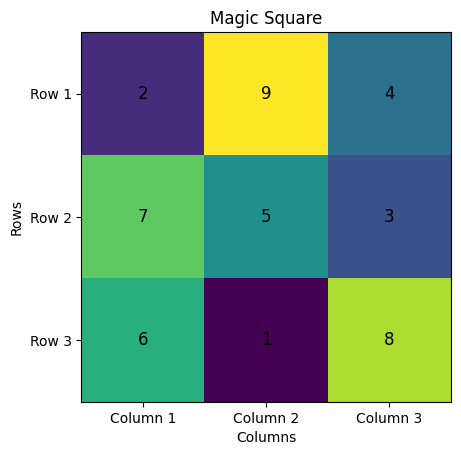

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Display the magic square
print("Magic Square:")
print(solved_matrix)

# Plot the magic square as a heatmap
plt.imshow(solved_matrix, cmap='viridis', interpolation='nearest')

# Add text annotations for each cell with variables
for (i, j), var in zip(positions, variables):
    plt.text(j, i, var,
             ha="center", va="center", color="black", fontsize=12)

# Set title and labels
plt.title('Magic Square')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(range(3), ['Column 1', 'Column 2', 'Column 3'])  # Set custom x-axis labels
plt.yticks(range(3), ['Row 1', 'Row 2', 'Row 3'])  # Set custom y-axis labels

# Remove the color bar legend
plt.colorbar().remove()

# Show the plot
plt.show()


In [25]:
import turtle

def draw_square(t, size):
    for _ in range(4):
        t.forward(size)
        t.right(90)

def draw_number(t, number, x, y):
    t.penup()
    t.goto(x, y)
    t.pendown()
    t.write(number, align="center", font=("Arial", 12, "normal"))

def draw_matrix(matrix):
    screen = turtle.Screen()
    screen.title("Matrix Turtle Drawing")
    screen.bgcolor("white")

    # Calculate the starting position for the matrix
    start_x = -150
    start_y = 150
    cell_size = 50

    # Create a turtle object
    t = turtle.Turtle()
    t.speed(0)  # Set the turtle speed (0 is the fastest)

    # Draw the matrix
    for i in range(3):  # Rows
        for j in range(3):  # Columns
            # Calculate the position of the current cell
            x = start_x + j * cell_size
            y = start_y - i * cell_size

            # Draw a square for the cell
            t.penup()
            t.goto(x, y)
            t.pendown()
            draw_square(t, cell_size)

            # Draw the number inside the cell
            draw_number(t, matrix[i][j], x + cell_size // 2, y - cell_size // 2)

    t.hideturtle()  # Hide the turtle after drawing

    # Keep the window open until it is closed by the user
    screen.mainloop()


# Call the draw_matrix function with the example matrix
draw_matrix(solved_matrix)
